In [ ]:
#Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [6]:
#Loading SQL database (Sakila database)

conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])


In [9]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [10]:
#What's the mean of film_rental_duration?
df['film_rental_duration'].mean()

4.935489902767389

<AxesSubplot:>

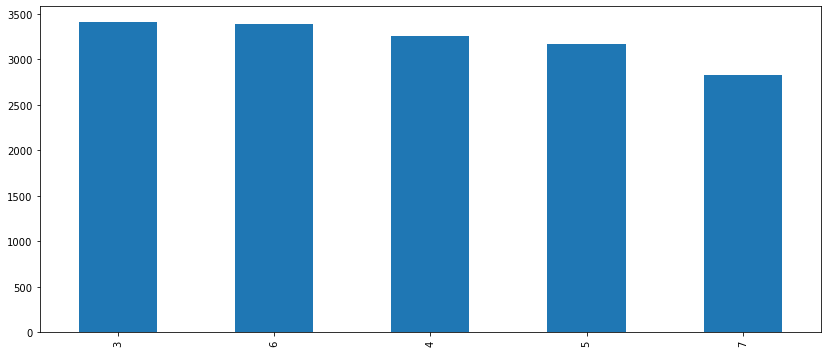

In [12]:
#What's the most common rental duration? -> Show a bar plot with all the durations.

df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))


<AxesSubplot:ylabel='film_rental_rate'>

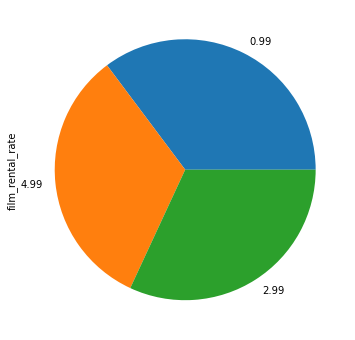

In [13]:
#What is the most common rental rate? -> Show a pie plot with all possible rental rates.
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(14,6))

<AxesSubplot:>

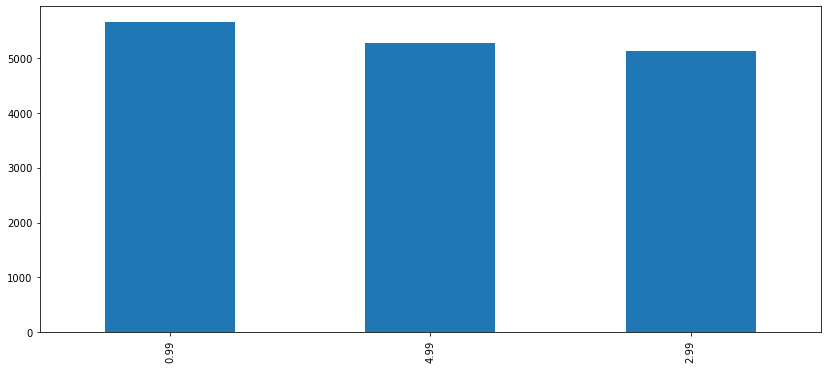

In [14]:
#What is the most common rental rate? -> Show a bar plot with all possible rental rates.
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:>

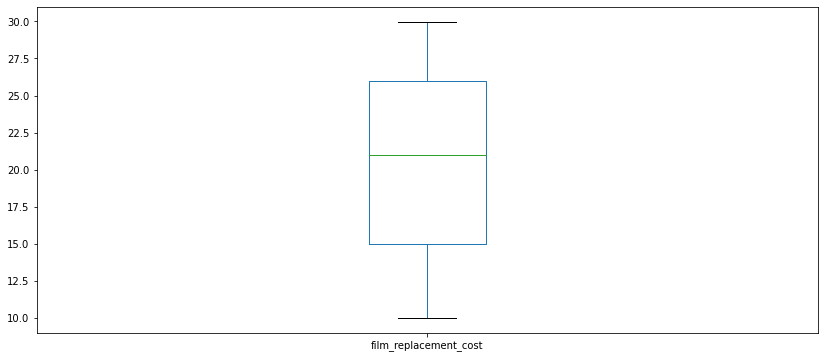

In [16]:
#How is the replacement cost distributed? -> Show a box plot of the replacement costs.
df['film_replacement_cost'].plot(kind='box', vert=True, figsize=(14,6))


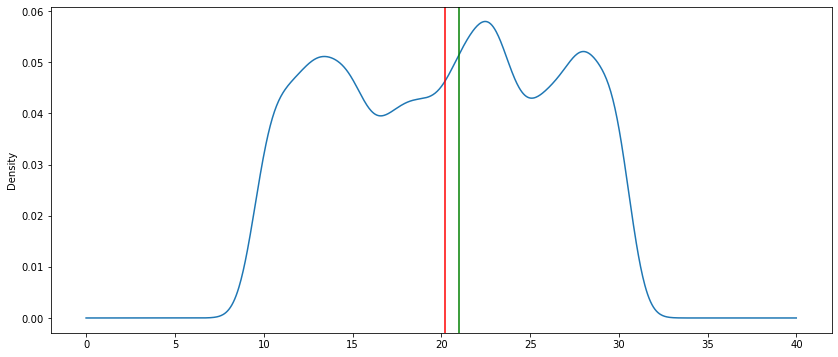

In [19]:
#How is the replacement cost distributed? -> Density plot - Green line: median - Red line: mean

density_plot = df['film_replacement_cost'].plot(kind='density',figsize=(14,6))
density_plot.axvline(df['film_replacement_cost'].mean(), color='red')
density_plot.axvline(df['film_replacement_cost'].median(), color='green')

In [20]:
#How many films of each rating do we have?
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<AxesSubplot:>

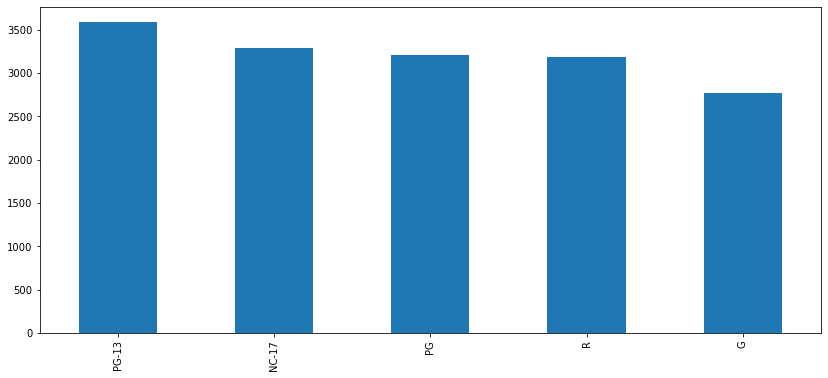

In [23]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:title={'center':'film_replacement_cost'}, xlabel='[film_rating]'>

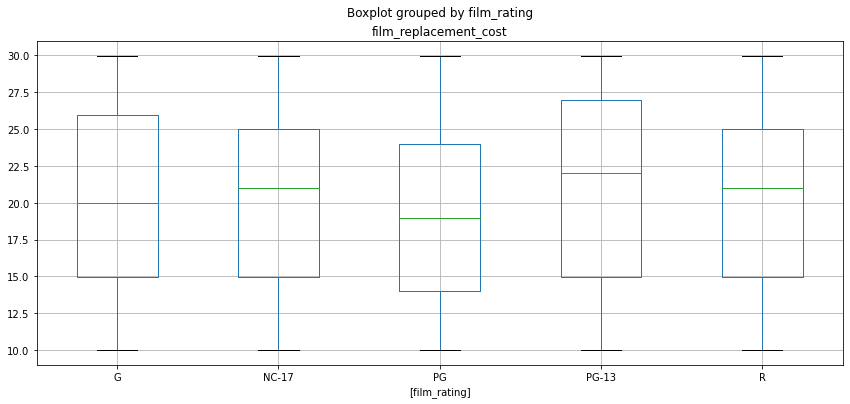

In [24]:
#Does the film replacement cost vary depending on film rating? -> box plot two columns
#G (General Audiences): All Ages are Admitted.
#PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
#PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
#R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
#NC-17 (Adults Only): No One 17 and Under Admitted.

df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6)) # by: independent variable


In [28]:
#Add new column called rental_days = rental_date - return_date
#.apply(lambda x: (x[1] - x[0]).days, axis=1 for add new column

df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0


In [29]:
#Analyze the distribution of rental_days -> mean and density function of rental_days

print('The mean of rental days is: ' + str(df['rental_days'].mean()))


The mean of rental days is: 4.525944139713763


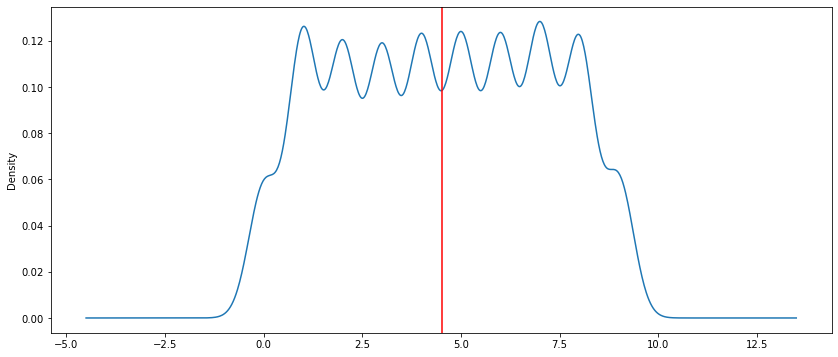

In [32]:
density_rental_days = df['rental_days'].plot(kind='density',figsize=(14,6))
density_rental_days.axvline(df['rental_days'].mean(), color='red')

In [34]:
# Add and calculate a new film_daily_rental_rate column
df['film_daily_rental_rate'] = df[['film_rental_rate', 'film_rental_duration']].apply(lambda x: (x[1] / x[0]), axis=1)
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,2.341137
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,2.341137
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,2.341137
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,6.060606
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,1.672241


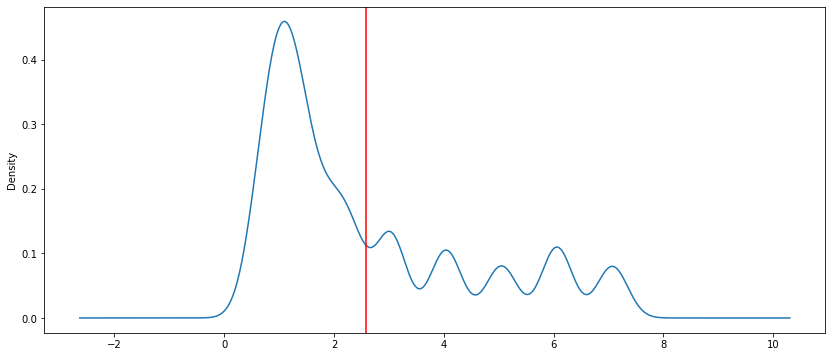

In [35]:
#Analyze the distribution of film_daily_rental_rate
df['film_daily_rental_rate'].mean()
density_film_daily_rental_rate = df['film_daily_rental_rate'].plot(kind='density',figsize=(14,6))
density_film_daily_rental_rate.axvline(df['film_daily_rental_rate'].mean(), color='red')

In [39]:
#List 10 films with the lowest daily rental rate
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,0.601202
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,0.601202
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,0.601202
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,0.601202
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,0.601202
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,0.601202
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,0.601202
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,0.601202
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,0.601202


In [44]:
#How many rentals were made in Lethbridge city?

df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

In [45]:
#How many rentals were made in Woodridge city with rental duration higher than 5 days?

df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

In [48]:
#How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?
df.loc[(df['store_id'] == 2) & (df['film_replacement_cost'] < 10.99)].shape[0]

361